# Decision Tree

### Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
X = df.drop("class", axis=1)
y = df["class"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101 )

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(random_state=101)

In [10]:
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 5, 10, 15], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 5] 
}

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
dt_grid_model = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, verbose=1)
dt_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [13]:
dt_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Performance Metrics

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [16]:
y_pred = dt_grid_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.99      1.00      1.00       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



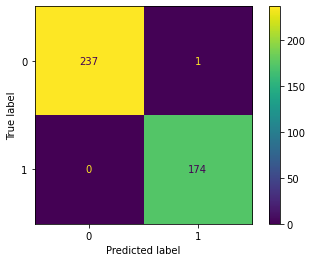

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()